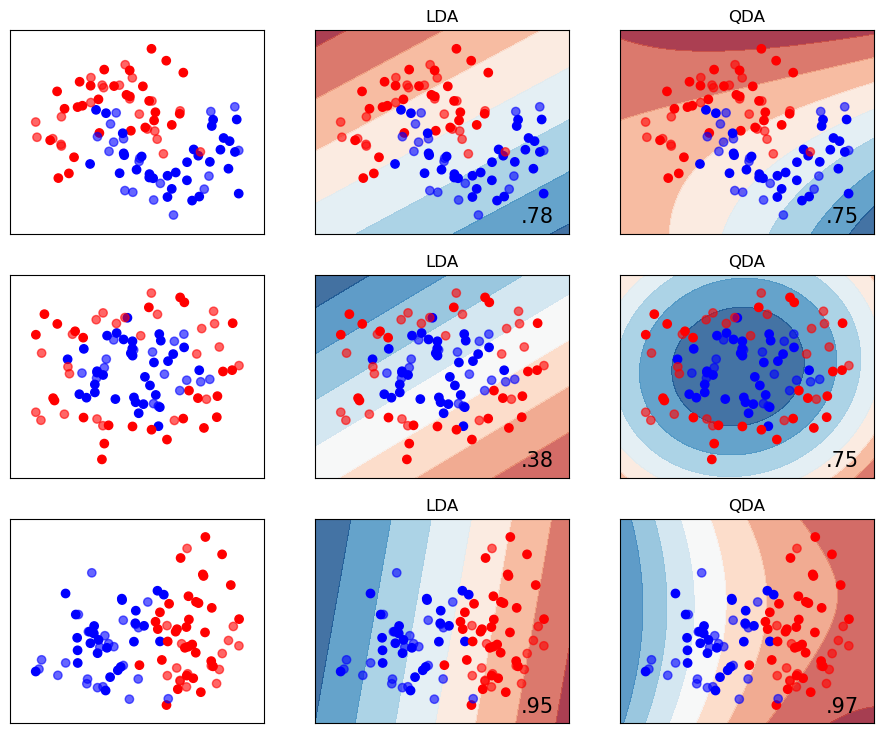

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 # step size in the mesh
names = [ "LDA", "QDA"]
classifiers = [ LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable ]
figure = plt.figure(figsize=(9, 9))
i = 1

# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
        i += 1
figure.subplots_adjust(left=.02, right=.98)
plt.show()


# Get Data, 데이터 가져오기

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [15]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [16]:
print(target_names)

['setosa' 'versicolor' 'virginica']


# Clean, Prepare & Manipulate Data, 데이터 전처리

In [17]:
X=StandardScaler().fit_transform(X)
# df_iris['sepal_length']=StandardScaler().fit_transform(df_iris[['sepal_length']])
# df_iris['sepal_width']=StandardScaler().fit_transform(df_iris[['sepal_width']])
# df_iris['petal_length']=StandardScaler().fit_transform(df_iris[['petal_length']])
# df_iris['petal_width']=StandardScaler().fit_transform(df_iris[['petal_width']])

# Train Model, 모델 학습

score_LDA:  0.9833333333333333
score_QDA:  0.9666666666666667


Text(0.5, 1.0, 'QDA')

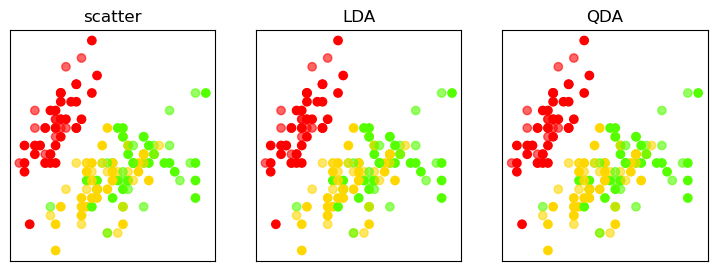

In [18]:
h = .02 # step size in the mesh
figure = plt.figure(figsize=(9, 3))

ax = plt.subplot(1,3,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='prism')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='prism', alpha=0.6)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("scatter")

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
score_LDA=LDA.score(X_test,y_test)
ax2 = plt.subplot(1,3,2)
print("score_LDA: ", score_LDA)
# Plot also the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='prism')
# and testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='prism', alpha=0.6)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title("LDA")

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
score_LDA=QDA.score(X_test,y_test)
ax3 = plt.subplot(1,3,3)
print("score_QDA: ", score_LDA)
# Plot also the training points
ax3.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='prism')
# and testing points
ax3.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='prism', alpha=0.6)
ax3.set_xticks(())
ax3.set_yticks(())
ax3.set_title("QDA")

# 4. Test Data, 모델 평가
LDA가 QDA에 비해 score가 높지만, 큰 차이 없다.

# Improve, 개선

score_LDA:  0.9833333333333333


Text(0.5, 1.0, 'LDA')

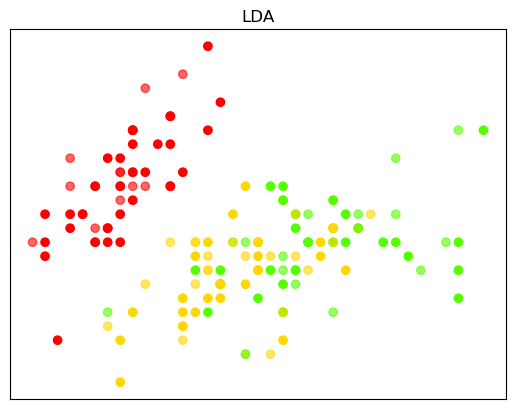

In [20]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
score_LDA=LDA.score(X_test,y_test)
ax2 = plt.subplot(1,1,1)
print("score_LDA: ", score_LDA)
# Plot also the training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='prism')
# and testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='prism', alpha=0.6)
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title("LDA")